# Proyecto práctico

## Unidad 3 - Aprendizaje supervisado

El proyecto práctico consiste en abordar un problema de clasificación de documentos textuales. Tenemos a nuestra disposición un dataset de noticias de prensa en español publicada por el medio "CNN Chile".

Las noticias están divididas en 7 categorías temáticas: *'pais','deportes','tendencias','tecnologias','cultura','economia','mundo'*

El proyecto se divide en dos partes:

- Utilizar al menos 3 estrategías para entrenar modelos de clasificación capaces de clasificar las noticias según su categoría temática.

- Explorar cuáles son las características que permiten explicar las decisiones de su modelo.

## 0 Evaluación

El proyecto se realiza de forma individual. Se entrega a más tardar el **lunes 30 de noviembre** en su repositorio GitHub.

**Pauta de evaluación:**

Competencia 1: Aplicar un protocolo de aprendizaje supervisado para resolver un problema clasificación estandar, utilizando un entorno de programación en Python

- < 2 : El protocolo de aprendizaje supervisado utilizado es incompleto y/o presenta errores importantes
- 2 a 3.9 : El protocolo de aprendizaje supervisado utilizado es incompleto o presenta un error importante
- 4 a 5.5 : El protocolo de aprendizaje es completo, no tiene error, pero las estrategias utilizadas son relativamente simples y el rendimiento de los modelos es perfectible.
- 5.6 a 7.0 : El protocolo de aprendizaje es completo, no tiene error y al menos una de las estrategias utilizadas a necesitado un trabajado más avanzado y/o permite obtener un mejor rendimiento.

Competencia 2: Explicar el rendimiento de un modelo de clasificación aplicando un protocolo de evaluación Precision/Recall/F-Score

- < 2 : El trabajo no presenta explicaciones del rendimiento de los modelos de clasificación
- 2 a 3.9 : El trabajo presenta algunas explicaciones pero tienen errores.
- 4 a 5.5 : El trabajo presenta explicaciones correctas del rendimiento de los modelos
- 5.6 a 7 : El trabajo presenta explicaciones correctas del rendimiento de los modelos y además presenta un método para explicar las decisiones/errores


## 1 Dataset

In [1]:
import pandas as pd

df = pd.read_csv('cnnchile_7000.csv')
df

,country,media_outlet,url,title,text,date,category
0,chile,cnnchile,https://www.cnnchile.com/pais/pdta-del-colegio...,Pdta. del Colegio de Matronas explicó los ries...,La Federación de Estudiantes de la Universidad...,2018-03-29 00:00:00.000000,pais
1,chile,cnnchile,https://www.cnnchile.com/pais/defensoria-ninez...,Defensoría de la Niñez pide al Estado velar po...,La Defensoría de la Niñez emitió este domingo ...,2020-08-02 00:00:00.000000,pais
2,chile,cnnchile,https://www.cnnchile.com/pais/cuanto-les-pagar...,¿Cuánto les pagarán a los vocales de mesa?,El monto del bono es de dos tercios de Unidad ...,2016-10-20 00:00:00.000000,pais
3,chile,cnnchile,https://www.cnnchile.com/pais/sobrino-de-aleja...,Sobrino de Alejandro Navarro intenta “funar” e...,Una nueva polémica tiene esta carrera presiden...,2017-11-13 00:00:00.000000,pais
4,chile,cnnchile,https://www.cnnchile.com/pais/analisis-sobre-e...,Análisis sobre el aumento de impuestos para al...,Especialistas recomiendan no consumir más de 2...,2014-05-05 00:00:00.000000,pais
...,...,...,...,...,...,...,...
6995,chile,cnnchile,https://www.cnnchile.com/tecnologias/playstati...,PlayStation 5 vs Xbox Series X: Mira la compar...,Las compañías ya han revelado muchos detalles ...,2020-09-18 00:00:00.000000,tecnologias
6996,chile,cnnchile,https://www.cnnchile.com/tecnologias/android-l...,Android le dará “una paliza” a Windows en 2013,Se proyecta que tras un virtual empate en 2012...,2013-04-04 00:00:00.000000,tecnologias
6997,chile,cnnchile,https://www.cnnchile.com/tecnologias/regalos-t...,Regalos tecnológicos marcaron pauta en Navidad,Tablets y smartphones fueron los regalos tecno...,2012-12-26 00:00:00.000000,tecnologias
6998,chile,cnnchile,https://www.cnnchile.com/tecnologias/jugar-con...,Jugar con Fox en Starlink vale totalmente la p...,Crecí jugando clásicos de naves como Terminal ...,2018-10-30 00:00:00.000000,tecnologias


In [2]:
from pandasql import sqldf

q="""SELECT category, count(*) FROM df GROUP BY category ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,category,count(*)
0,tendencias,1000
1,tecnologias,1000
2,pais,1000
3,mundo,1000
4,economia,1000
5,deportes,1000
6,cultura,1000


<AxesSubplot:xlabel='category', ylabel='count'>

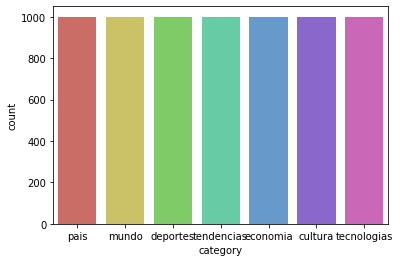

In [3]:
import seaborn as sb

sb.countplot(x='category',data=df, palette='hls')

In [4]:
df.isnull().sum()

country         0
media_outlet    0
url             0
title           1
text            0
date            0
category        0
dtype: int64

In [5]:
import spacy

nlp = spacy.load("es")

## 2 Bag of Words + tf-idf

Para la primera implementación de una solución, se escogió el método de regresión lógistica, **Bag of Words + tf-idf**, esto dado las características del problema (clasificación de texto por categoría).

In [6]:
def feature_extraction(text):
    
    mytokens = nlp(text)

    #Guardamos las palabras como características si corresponden a ciertas categorias gramaticales
    mytokens = [ word for word in mytokens if word.pos_ in ["NOUN", "ADJ", "VERB"] ]
    
    #Transformamos las palabras en minusculas
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # return preprocessed list of tokens
    return mytokens

In [7]:
def printMostImportantFeatures(vectorizer, model, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(model.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)

Se busca identificar la categoría de la noticia mediante el texto de esta, se separa la muestra en una submuestra a utilizar para el entrenamiento y otra para testear la máquina, cada una con sus respectivas etiquetas.

In [9]:
from sklearn.model_selection import train_test_split

X = df['text'] 
ylabels = df['category']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.5)

La máquina es entrenada usando Pipeline y LogisticRegresion de la librería sklearn.
El método LogisticRegresion de sklearn, funciona para los casos multiclass como este, usando un algoritmo OvR (One vs Rest) o bien usando la función de perdida Cross-Entropy. Esto se puede ajustar cambiando el valor del parametro multi_class en el método LogisticRegresion, el valor por defecto es 'auto'.

In [10]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()

pipe = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', model_2)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizing',
                 TfidfVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x121980160>)),
                ('learning', LogisticRegression())])

### 2.1 Evaluación del Modelo

In [11]:
from sklearn import metrics

predicted = pipe.predict(X_test)

print(predicted)

['deportes' 'economia' 'deportes' ... 'cultura' 'tecnologias' 'deportes']


In [12]:
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.7568571428571429


Este modelo nos da una precisión aproximada del 76% 

In [13]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

[[448   1   1  15   9   6  22]
 [  5 429  10  10  12   3  30]
 [  0  11 410  13  54  15   4]
 [ 16  16  30 359  38  12  25]
 [  3  12  47  58 341  12  14]
 [ 12  23  25   9  22 352  58]
 [ 57  27  14  19  20  61 310]]
              precision    recall  f1-score   support

     cultura       0.83      0.89      0.86       502
    deportes       0.83      0.86      0.84       499
    economia       0.76      0.81      0.79       507
       mundo       0.74      0.72      0.73       496
        pais       0.69      0.70      0.69       487
 tecnologias       0.76      0.70      0.73       501
  tendencias       0.67      0.61      0.64       508

    accuracy                           0.76      3500
   macro avg       0.75      0.76      0.75      3500
weighted avg       0.75      0.76      0.76      3500



Tomando en cuenta que el índice de precisión se refiere a la proporción de true positives dentro de todos los true and false positives, el recall es proporción de true positives dentro de true positives y false negatives, mientras que el f1-score es la media entre precisión y recall.

El modelo muestra **menor nivel de precisión** al predecir noticias de la categoría **tendencias** con un **0.67** y un **mayor nivel** al predecir noticias de **cultura y deportes** con **0.83**, mientras que presenta **mayor recall** en la predicción de noticias de **cultura** con **0.89** y **menor en tendencias** con **0.61**. En promedio, el modelo es mejor al predecir noticias de cultura y deportes con un f1-score de 0.87 y 0.88 respectivamente.

In [14]:
printMostImportantFeatures(tfidf_vector, model_2, 20)

Class 1 best: 
(-1.4069665268761737, 'adjuntar')
(-1.1851709376967883, 'presidente')
(-1.1492887069118471, "'")
(-1.1348895822055949, '=')
(-1.0893814293271085, 'empresa')
(-1.0847154186733752, 'video')
(-1.0287825310075909, 'utilizar')
(-0.9180478682013332, 'detalle')
(-0.8498893891160231, 'jugador')
(-0.8385596377204037, 'ministro')
(-0.8156701298814562, 'jugar')
(-0.8094633478004927, 'lanoticiacnn')
(-0.7834793146527861, 'aumentar')
(-0.7170742111339268, 'informar')
(-0.7080939598845304, 'revisar')
(-0.7021631833551993, 'usuario')
(-0.6720727122296414, 'blocar')
(-0.6540487229595922, 'producto')
(-0.6501418357966208, 'fútbol')
(-0.6500703081412149, 'mandatario')
Class 2 best: 
(3.512817493258223, 'película')
(3.183905100170615, 'artista')
(2.6914621746886054, 'seriar')
(2.5639322665237203, 'canción')
(2.4860217636791075, 'músico')
(2.350782739912899, 'banda')
(2.2990296425925747, 'estrenar')
(2.2669341329560795, 'ser')
(2.1206633414984264, 'cantante')
(2.0686290171835693, 'historia'

## 3 Naïve Bayes

### 3.1 Entrenamiento MultinomialNB

In [280]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

nb = MultinomialNB()

model_nb = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', nb)])

In [281]:
model_nb.fit(X_train, y_train)

Pipeline(steps=[('vectorizing',
                 TfidfVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x126d8a940>)),
                ('learning', MultinomialNB())])

### 3.2 Evaluación del Modelo MultinomialNB

In [282]:
predicted = model_nb.predict(X_test)

In [284]:
from sklearn import metrics
# Model Accuracy
print("Naïve Bayes Accuracy:",metrics.accuracy_score(y_test, predicted))

Naïve Bayes Accuracy: 0.7568571428571429


In [285]:
from sklearn import metrics
from sklearn.metrics import classification_report

confusion_matrix = metrics.confusion_matrix(y_test, predicted)

print(confusion_matrix)

print(classification_report(y_test, predicted))

[[478   0   2  16   6   4   4]
 [ 21 418  17  16   9   7  20]
 [  3  14 429   6  30  21   2]
 [ 23  12  32 367  38  20  11]
 [ 13  13  59  50 344   4  15]
 [ 29  21  32   7  15 352  53]
 [ 81  15   9  18  15  68 261]]
              precision    recall  f1-score   support

     cultura       0.74      0.94      0.83       510
    deportes       0.85      0.82      0.84       508
    economia       0.74      0.85      0.79       505
       mundo       0.76      0.73      0.75       503
        pais       0.75      0.69      0.72       498
 tecnologias       0.74      0.69      0.71       509
  tendencias       0.71      0.56      0.63       467

    accuracy                           0.76      3500
   macro avg       0.76      0.75      0.75      3500
weighted avg       0.76      0.76      0.75      3500



Con este modelo obtenemos un **accuracy de 0.76**, donde la categoría con **mayor índice de precision** al predecir es **deportes** con **0.85** y el con **menor precision es tendencias** con **0.71**. La categoría con **mayor recall es cultura** con **0.94** y la de **menor recall es tendencias** con **0.56**. Promediando precision y recall obtenemos que los **mejores f1-scores** son en **deportes, cultura y economía**, cada uno con **0.84, 0.83 y 0.79** respectivamente

A continuación encontramos las 10 palabras con mayor probabilidad logarítmica para cada categoría según el modelo Naïve Bayes:

In [ ]:
def get_salient_words(nb_clf, vect, class_ind):
    """Return salient words for given class
    Parameters
    ----------
    nb_clf : a Naive Bayes classifier (e.g. MultinomialNB, BernoulliNB)
    vect : CountVectorizer
    class_ind : int
    Returns
    -------
    list
        a sorted list of (word, log prob) sorted by log probability in descending order.
    """

    words = vect.get_feature_names()
    zipped = list(zip(words, nb_clf.feature_log_prob_[class_ind]))
    sorted_zip = sorted(zipped, key=lambda t: t[1], reverse=True)

    return sorted_zip

cul_salient_top = get_salient_words(nb, tfidf_vector, 0)[:10]
dep_salient_top = get_salient_words(nb, tfidf_vector, 1)[:10]
eco_salient_top = get_salient_words(nb, tfidf_vector, 2)[:10]
mun_salient_top = get_salient_words(nb, tfidf_vector, 3)[:10]
pai_salient_top = get_salient_words(nb, tfidf_vector, 4)[:10]
tec_salient_top = get_salient_words(nb, tfidf_vector, 5)[:10]
ten_salient_top = get_salient_words(nb, tfidf_vector, 6)[:10]

print('Cultura:')
print(cul_salient_top)
print('Deporte:')
print(dep_salient_top)
print('Economía:')
print(eco_salient_top)
print('Mundo:')
print(mun_salient_top)
print('País:')
print(pai_salient_top)
print('Tecnología:')
print(tec_salient_top)
print('Tendencia:')
print(ten_salient_top)

## 4 Neuronal Networks

### 4.1 Preparación de los Datos

Como primer paso para el diseño de nuestro modelo, debemos separar el dataset en tres muestras de este, una para entrenar el modelo, otro para validación y el último para testearlo. Se escogió dividirlo con una razón de 0.7 para la muestra de entrenamiento y 0.15 tanto para validación como para testeo.

In [194]:
from numpy.random import RandomState

rng = RandomState()

train = df.sample(frac=0.7, random_state=rng)
aux = df.loc[~df.index.isin(train.index)]
valid = aux.sample(frac=0.5, random_state=rng)
test = aux.loc[~aux.index.isin(valid.index)]

train.to_csv('train_data.csv')
valid.to_csv('valid_data.csv')
test.to_csv('test_data.csv')

<AxesSubplot:xlabel='category', ylabel='count'>

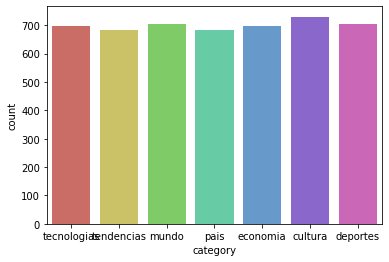

In [195]:
sb.countplot(x='category',data=train, palette='hls')

Como la distribución de los datos por categoría en la muestra de entrenamiento es pareja, se acepta la subdivisión actual para continuar

In [196]:
import torch
import spacy
import random
import torchtext
from torchtext import data
from torchtext import datasets

In [197]:
import numpy as np

SEED = 1234

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

TEXT = data.Field(tokenize = 'spacy')
LABEL = data.LabelField()

In [198]:
fields = [(None, None), (None,None), (None,None), (None,None), (None,None), ('text', TEXT), (None,None), ('category', LABEL)]

train_data, valid_data, test_data = data.TabularDataset.splits(
                                        path = '.',
                                        train = 'train_data.csv',
                                        validation= 'valid_data.csv',
                                        test = 'test_data.csv',
                                        format = 'csv',
                                        fields = fields,
                                        skip_header = True
)

In [199]:
print(vars(train_data[0]))

{'text': ['Desde', 'el', '26', 'de', 'Octubre', 'al', '\xa0', '1', 'de', 'Noviembre', ',', 'se', 'llevará', 'a', 'cabo', 'el', 'evento', 'de', 'Halloween', 'donde', 'habrá', 'mayor', 'presencia', 'noctura', 'de', 'pokémon', 'como', '\xa0', 'Gastly', ',', 'Hunter', ',', 'Gengar', ',', '\xa0', 'Zubat', ',', 'Golbat', ',', 'Drowzee', 'e', 'Hypno', '.', 'Además', ',', 'se', 'duplicarán', 'la', 'obtención', 'de', 'caramelos', 'al', 'momento', 'de', 'eclosionar', 'un', 'huevo', ',', 'atrapar', 'un', 'pokémon', 'o', 'transferirlo', 'a', 'la', 'granja', '.', 'También', 'se', 'conseguirá', 'más', 'caramelos', 'con', 'el', 'acompañante', ',', 'ya', 'que', 'la', 'medición', 'del', 'kilometraje', 'será', '4', 'veces', 'mejor', '.', 'Este', 'será', 'un', 'hito', 'en', 'Pokémon', 'GO', 'para', 'probar', 'el', 'primer', 'evento', 'desde', 'el', 'lanzamiento', 'del', 'juego', '.'], 'category': 'tecnologias'}


In [286]:
BATCH_SIZE = 20

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    device = device,
    sort_key=lambda x:len(x.category),
    sort_within_batch=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torchtext/data/iterator.py:48: UserWarning: BucketIterator class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Se usó un Batch Size de 20 con la intención de que el tiempo de entrenamiento por batch no fuera demasiado alto.

### 4.2 Arquitectura CNN

Se cargan vectores de palabras en español

In [287]:
MAX_VOCAB_SIZE = 25000

vec = torchtext.vocab.Vectors('glove-sbwc.i25.vec', cache='./Downloads/')

TEXT.build_vocab(train_data, 
                 max_size = MAX_VOCAB_SIZE, 
                 vectors = vec, 
                 unk_init = torch.Tensor.normal_)

LABEL.build_vocab(train_data)

In [288]:
print(LABEL.vocab.stoi)

defaultdict(None, {'cultura': 0, 'deportes': 1, 'mundo': 2, 'economia': 3, 'tecnologias': 4, 'tendencias': 5, 'pais': 6})


El modelo usa valores númericos para cada categoría, los cuales son asignados de forma automática y corresponden a cada uno de la siguiente forma:

- 0: Cultura
- 1: Deportes
- 2: Mundo
- 3: Economía
- 4: Tecnologías
- 5: Tendencias
- 6: País

In [289]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        self.convs = nn.ModuleList([
                                    nn.Conv2d(in_channels = 1, 
                                              out_channels = n_filters, 
                                              kernel_size = (fs, embedding_dim)) 
                                    for fs in filter_sizes
                                    ])
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):
        
        #text = [sent len, batch size]
        
        text = text.permute(1, 0)
                
        #text = [batch size, sent len]
        
        embedded = self.embedding(text)
                
        #embedded = [batch size, sent len, emb dim]
        
        embedded = embedded.unsqueeze(1)
        
        #embedded = [batch size, 1, sent len, emb dim]
        
        conved = [F.relu(conv(embedded)).squeeze(3) for conv in self.convs]
            
        #conv_n = [batch size, n_filters, sent len - filter_sizes[n]]
        
        pooled = [F.max_pool1d(conv, conv.shape[2]).squeeze(2) for conv in conved]
        
        #pooled_n = [batch size, n_filters]
        
        cat = self.dropout(torch.cat(pooled, dim = 1))

        #cat = [batch size, n_filters * len(filter_sizes)]
            
        return self.fc(cat)

In [290]:
INPUT_DIM = len(TEXT.vocab)
EMBEDDING_DIM = 300
N_FILTERS = 100
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = len(LABEL.vocab)
DROPOUT = 0.5
PAD_IDX = TEXT.vocab.stoi[TEXT.pad_token]

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

Después de múltiples pruebas con el número de filtros y los tamaños, se opta por usar 100 filtros de tamaños 3, 4 y 5.

In [291]:
pretrained_embeddings = TEXT.vocab.vectors

model.embedding.weight.data.copy_(pretrained_embeddings)

UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

### 4.3 Funciones de optimización

In [292]:
import torch.optim as optim

optimizer = optim.Adam(model.parameters())

criterion = nn.CrossEntropyLoss()

model = model.to(device)
criterion = criterion.to(device)

In [293]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [294]:
def train(model, iterator, optimizer, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.train()
    
    for batch in iterator:
    
        optimizer.zero_grad()
        
        predictions = model(batch.text)
        
        loss = criterion(predictions, batch.category)
        
        acc = categorical_accuracy(predictions, batch.category)
        
        loss.backward()
        
        optimizer.step()
        
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)


### 4.4 Funciones de evaluación

In [295]:
def categorical_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    max_preds = preds.argmax(dim = 1, keepdim = True) # get the index of the max probability
    correct = max_preds.squeeze(1).eq(y)
    return correct.sum() / torch.FloatTensor([y.shape[0]])

In [296]:
def evaluate(model, iterator, criterion):
    
    epoch_loss = 0
    epoch_acc = 0
    
    model.eval()
    
    with torch.no_grad():
    
        for batch in iterator:

            predictions = model(batch.text)
            
            loss = criterion(predictions, batch.category)
            
            acc = categorical_accuracy(predictions, batch.category)

            epoch_loss += loss.item()
            epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

### 4.5 Entrenamiento del modelo

In [297]:
N_EPOCHS = 6

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train(model, train_iterator, optimizer, criterion)
    valid_loss, valid_acc = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), './category-model-CNN'+'_ep'+str(epoch+1)+'.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/torchtext/data/batch.py:23: UserWarning: Batch class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.
  warnings.warn('{} class will be retired soon and moved to torchtext.legacy. Please see the most recent release notes for further information.'.format(self.__class__.__name__), UserWarning)


Epoch: 01 | Epoch Time: 16m 27s
	Train Loss: 1.341 | Train Acc: 49.37%
	 Val. Loss: 0.860 |  Val. Acc: 68.68%
Epoch: 02 | Epoch Time: 14m 20s
	Train Loss: 0.784 | Train Acc: 72.45%
	 Val. Loss: 0.774 |  Val. Acc: 71.70%
Epoch: 03 | Epoch Time: 14m 23s
	Train Loss: 0.551 | Train Acc: 81.65%
	 Val. Loss: 0.728 |  Val. Acc: 75.09%
Epoch: 04 | Epoch Time: 14m 6s
	Train Loss: 0.348 | Train Acc: 88.71%
	 Val. Loss: 0.748 |  Val. Acc: 74.91%
Epoch: 05 | Epoch Time: 14m 19s
	Train Loss: 0.228 | Train Acc: 92.88%
	 Val. Loss: 0.726 |  Val. Acc: 75.28%
Epoch: 06 | Epoch Time: 15m 34s
	Train Loss: 0.158 | Train Acc: 95.29%
	 Val. Loss: 0.776 |  Val. Acc: 76.04%


Debido a la condición establecida que dice que solo se guardan los modelos donde el valor de su valid_loss sea menor al best_valid_loss, solo se guardan los modelos 1, 2, 3 y 5. De estos, el mejor es el quinto y es a este al que evaluaremos a continuación.

### 4.6 Evaluación del modelo

In [306]:
best_model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [307]:
pretrained_embeddings = TEXT.vocab.vectors
UNK_IDX = TEXT.vocab.stoi[TEXT.unk_token]

best_model.embedding.weight.data.copy_(pretrained_embeddings)
best_model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
best_model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [308]:
name = './category-model-CNN'+'_ep'+str(5)+'.pt'
best_model.load_state_dict(torch.load(name))

<All keys matched successfully>

In [309]:
prediction_test = []
labels_test=[]
for batch in test_iterator:
    labels_test.append(batch.category.cpu().detach().numpy())
    predictions = best_model(batch.text.cpu()).squeeze(1)
    rounded_preds = predictions.argmax(dim = 1, keepdim = True)
    prediction_test.append(rounded_preds.detach().numpy())
    
y_true = np.concatenate(labels_test)
y_pred = np.concatenate(prediction_test)

In [310]:
display(y_pred,y_true)

array([[3],
       [6],
       [6],
       ...,
       [1],
       [4],
       [4]])

array([6, 6, 6, ..., 4, 4, 4])

In [311]:
y_pred[:,0]

array([3, 6, 6, ..., 1, 4, 4])

In [312]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report

cm = confusion_matrix(
    y_true, y_pred[:,0])
display(cm)

print(classification_report(y_true, y_pred[:,0]))

array([[ 99,   0,   5,   0,   6,  19,   6],
       [  0, 117,   5,   7,   1,   3,  10],
       [  3,   1, 104,  10,   4,   3,  28],
       [  0,   3,   4, 106,   7,   2,  27],
       [  2,   6,   3,   7, 113,  17,   8],
       [ 11,   3,   8,   5,  25, 105,   9],
       [  2,   3,  18,   9,   2,   1, 113]])

              precision    recall  f1-score   support

           0       0.85      0.73      0.79       135
           1       0.88      0.82      0.85       143
           2       0.71      0.68      0.69       153
           3       0.74      0.71      0.72       149
           4       0.72      0.72      0.72       156
           5       0.70      0.63      0.66       166
           6       0.56      0.76      0.65       148

    accuracy                           0.72      1050
   macro avg       0.74      0.72      0.73      1050
weighted avg       0.73      0.72      0.72      1050



Como primer método de evaluación usamos la matriz de confusión y el reporte de clasificación, este nos dice que el modelo tiene un **0.88 de precision** al predecir noticias de la clase 1 (**Deportes**), y tan solo un **0.56 de precision** al predecir noticias de la clase 6 (**País**). En cuanto al **recall**, tenemos **0.82** para la clase 1 (**Deportes**), mientras que el **menor recall** lo tenemos en la clase 5 (**País**) con un **0.63**. Los **mejores f1-score** son para las clases 1 y 0 (**Deportes y Cultura**) con **0.85 y 0.79**, mientras que **los más bajos** son para las clases 6 y 5 (**País y Tendencias**) con **0.65 y 0.66**.
Además este método de evaluación nos arroja un **accuracy** del **0.72**.

In [313]:
model.load_state_dict(torch.load('category-model-CNN'+'_ep'+str(5)+'.pt'))

test_loss, test_acc = evaluate(model, test_iterator, criterion)

print(f'Test Loss: {test_loss:.3f} | Test Acc: {test_acc*100:.2f}%')

Test Loss: 0.761 | Test Acc: 74.34%


El segundo método de evaluación nos entrega el cálculo de la función de pérdida y el accuracy en el testeo usando el método evaluate() que se encuentra definido más arriba. Para la función de pérdida se usa CrossEntropy, mientras que el accuracy está definido como la precisión categórica, la cual nos da el accuracy por batch.

### 5 Conclusión

En este trabajo, el mejor modelo en cuanto a accuracy terminó siendo el de Naïve Bayes con un 75%, aún así, el modelo de redes neuronales podría seguir siendo mejorado cambiando parámetros como el batch size, el número y tamaños de filtros, número de epochs, etc.